### Student Information
Name: 林君騰

Student ID: 711233125

GitHub ID: Teng5488

---

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

# **take home excercise**

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
#Answer here
X.iloc[:10, 2]

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
5    soc.religion.christian
6    soc.religion.christian
7                   sci.med
8                   sci.med
9                   sci.med
Name: category_name, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

A, B, and E are considered missing values because np.nan and None are standard representations of missing values, and B is missing a value entirely. 
C, D, and F, however, are not considered missing values because they have values assigned, even though those values are NaN, None, or an empty string (''). These values themselves don't denote missing values.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
len(X)

2257

In [6]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

In [7]:
X_sample = X.sample(n=1000) #random state

In [8]:
len(X_sample)

1000

In [9]:
X_sample[0:4]

text  category  \
648   From: kcochran@nyx.cs.du.edu (Keith "Justified...         0   
1367  From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
1840  From: jayne@mmalt.guild.org (Jayne Kulikauskas...         3   
1323  From: max@slinky.NYU.EDU (David Max) Subject: ...         1   

               category_name  
648              alt.atheism  
1367             alt.atheism  
1840  soc.religion.christian  
1323           comp.graphics

The lengths differ because X_sample is a random sample of X, so its length is shorter than X.
When we look at the first four rows of both X_sample and X, we can see that their rows are also different.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

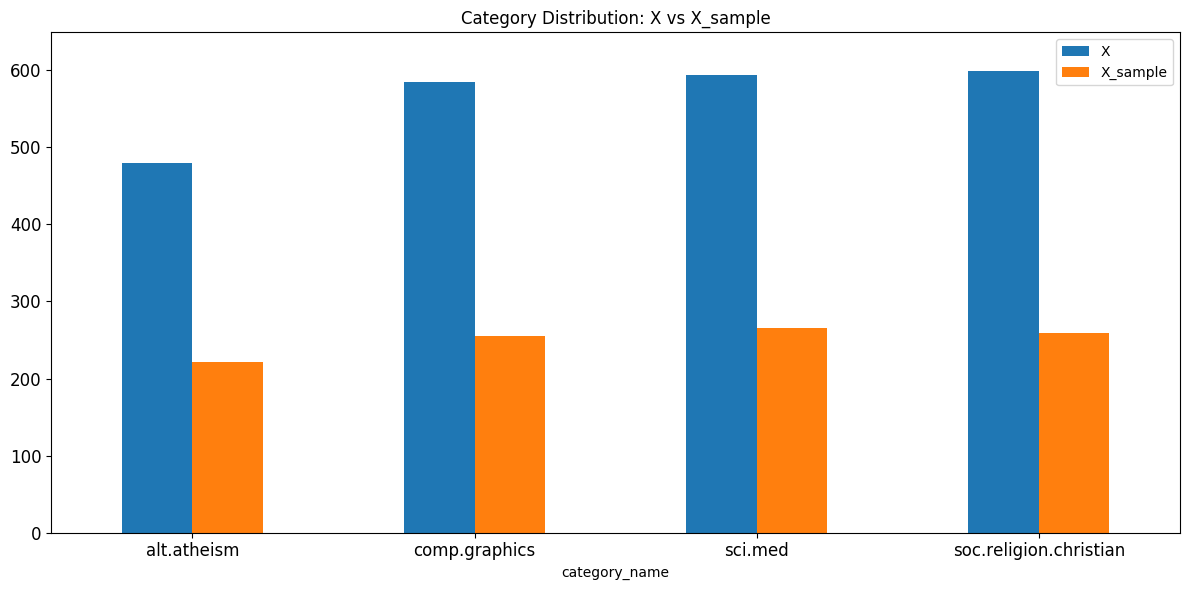

In [10]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt


X_category_counts = X.category_name.value_counts()
X_sample_category_counts = X_sample.category_name.value_counts()


df_combined = pd.DataFrame({'X': X_category_counts, 'X_sample': X_sample_category_counts})
df_combined = df_combined.fillna(0)
plt.style.use('_classic_test_patch')

df_combined.plot(kind='bar', 
                 figsize=(12, 6), 
                 rot=0, 
                 fontsize=12, 
                 title='Category Distribution: X vs X_sample')

plt.ylim([0, max(max(X_category_counts), max(X_sample_category_counts)) + 50])
plt.tight_layout()
plt.show()



In [11]:
import nltk
nltk.download('punkt')

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
# Answer here
count_vect.get_feature_names_out()[np.where(X_counts[4].toarray() == 1)[1][0]]


'00'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})

top_terms = term_freq_df.sort_values(by='frequency', ascending=False).head(10)
top_terms_list = top_terms['term'].tolist()
top_term_indices = [count_vect.vocabulary_[term] for term in top_terms_list]

doc_frequencies = np.asarray(X_counts.sum(axis=1)).flatten()

top_docs_indices = np.argsort(doc_frequencies)[-10:]

plot_x = ["term_" + str(term) for term in top_terms_list]
plot_y = ["doc_" + str(i) for i in top_docs_indices]
plot_z = X_counts[top_docs_indices, :][:, top_term_indices].toarray()

print(plot_x)
print(plot_y)
print(plot_z)


['term_the', 'term_of', 'term_to', 'term_and', 'term_is', 'term_in', 'term_that', 'term_it', 'term_you', 'term_for']
['doc_1103', 'doc_1705', 'doc_1596', 'doc_1401', 'doc_971', 'doc_768', 'doc_400', 'doc_1403', 'doc_1890', 'doc_433']
[[200 122 126 112  55  76  61  56  28  36]
 [158 177  48 118  21  68  19   7  11  41]
 [265 162 112  73 141  98 115  71  28  30]
 [217 204  80 151  28 146  29   5   0  92]
 [175 155 179  73 126  82 130  92  29  48]
 [200 164 103 254  90  69  38  87  19 105]
 [249 165 135 207 114 109  39  76  52 157]
 [589 326 281 208 174 135 120 111  49  60]
 [242  89 157 185  77 100  25  47  45 133]
 [362 190 227 150 200 108  85 123 190 117]]


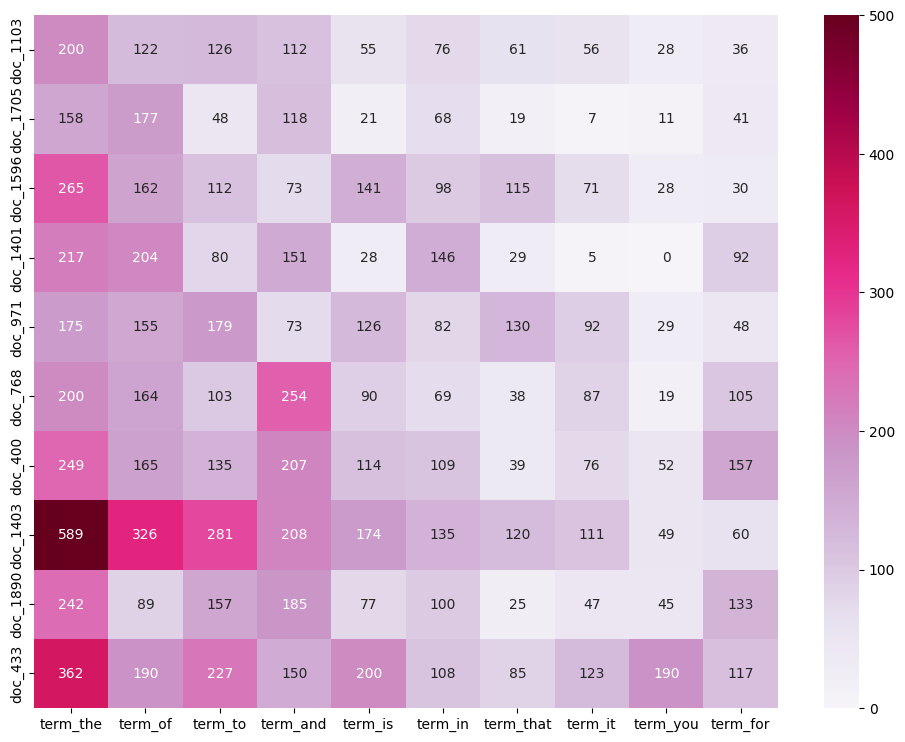

In [14]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=500, annot=True, fmt="d")

# we take the top 10 terms with the highest frequency so that we can avoid many 0s

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [15]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'x': count_vect.get_feature_names_out()[:100],
    'y': term_frequencies[:100]
})

fig = px.bar(df, x='x', y='y')
fig.update_layout(xaxis_tickangle=90)  
fig.show()



### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


C:\Users\Lin\AppData\Local\Temp\ipykernel_45300\662509868.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



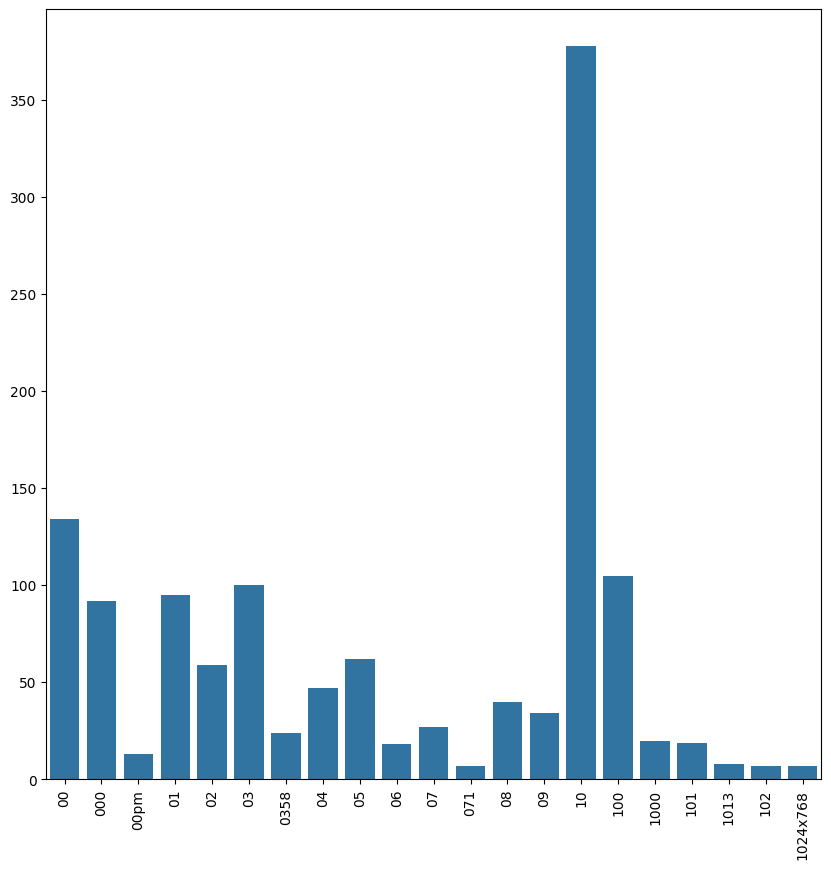

In [16]:
# Answer here

# Filter the data
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]

# Filter the data by frequency k (e.g., 5)
k = 5
filtered_features = [feature for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]
filtered_frequencies = [freq for freq in filtered_frequencies if freq > k]

# Plot
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features, y=filtered_frequencies)
g.set_xticklabels(filtered_features, rotation=90)
plt.show()


### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

C:\Users\Lin\AppData\Local\Temp\ipykernel_45300\1905746360.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



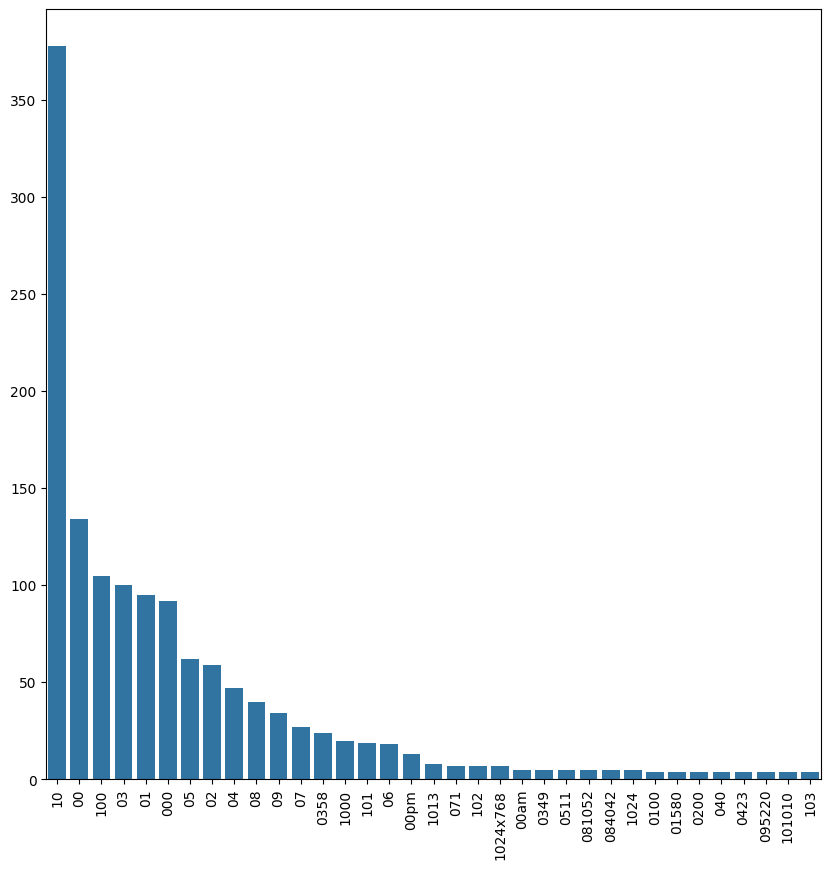

In [17]:
# Answer here

# Filter the data
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]
k = 3
filtered_data = [(feature, freq) for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]

# Sort the data by frequency
filtered_data.sort(key=lambda x: x[1], reverse=True)
filtered_features_sorted, filtered_frequencies_sorted = zip(*filtered_data)

# Plot
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features_sorted, y=filtered_frequencies_sorted)
g.set_xticklabels(filtered_features_sorted, rotation=90)
plt.show()


### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

C:\Users\Lin\AppData\Local\Temp\ipykernel_45300\3565274710.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



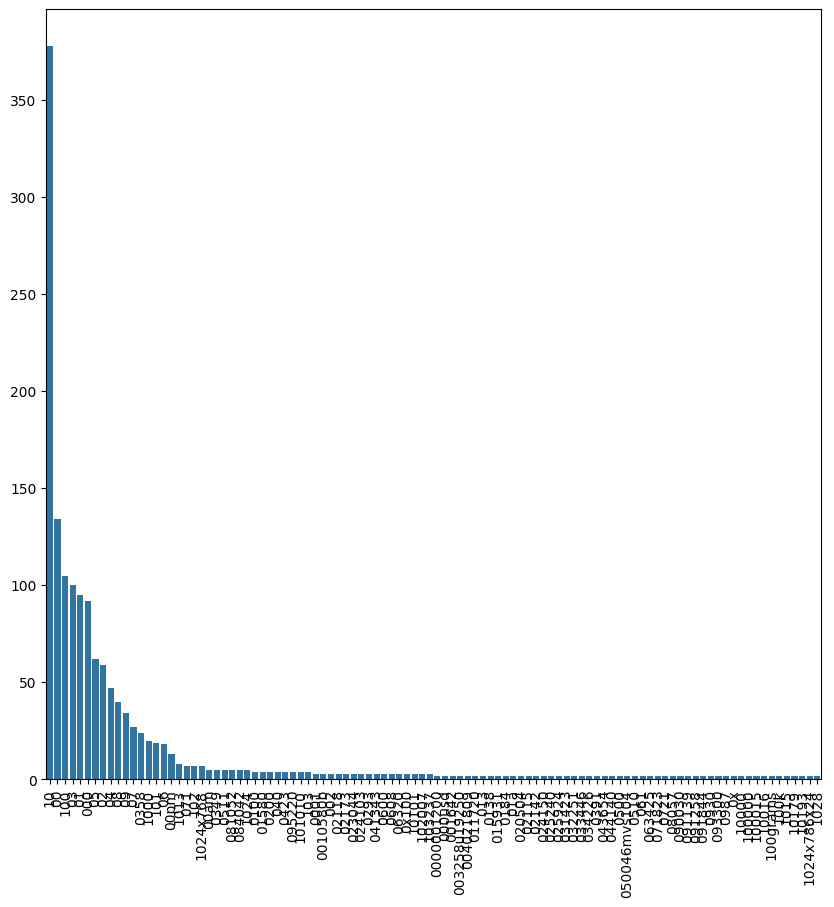

In [18]:
# Answer here

# Filter the data
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]
k = 1
filtered_data = [(feature, freq) for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]

# Sort the data by frequency
filtered_data.sort(key=lambda x: x[1], reverse=True)
filtered_features_sorted, filtered_frequencies_sorted = zip(*filtered_data)

# Plot
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features_sorted, y=filtered_frequencies_sorted)
g.set_xticklabels(filtered_features_sorted, rotation=90)
plt.show()


C:\Users\Lin\AppData\Local\Temp\ipykernel_45300\1948107605.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



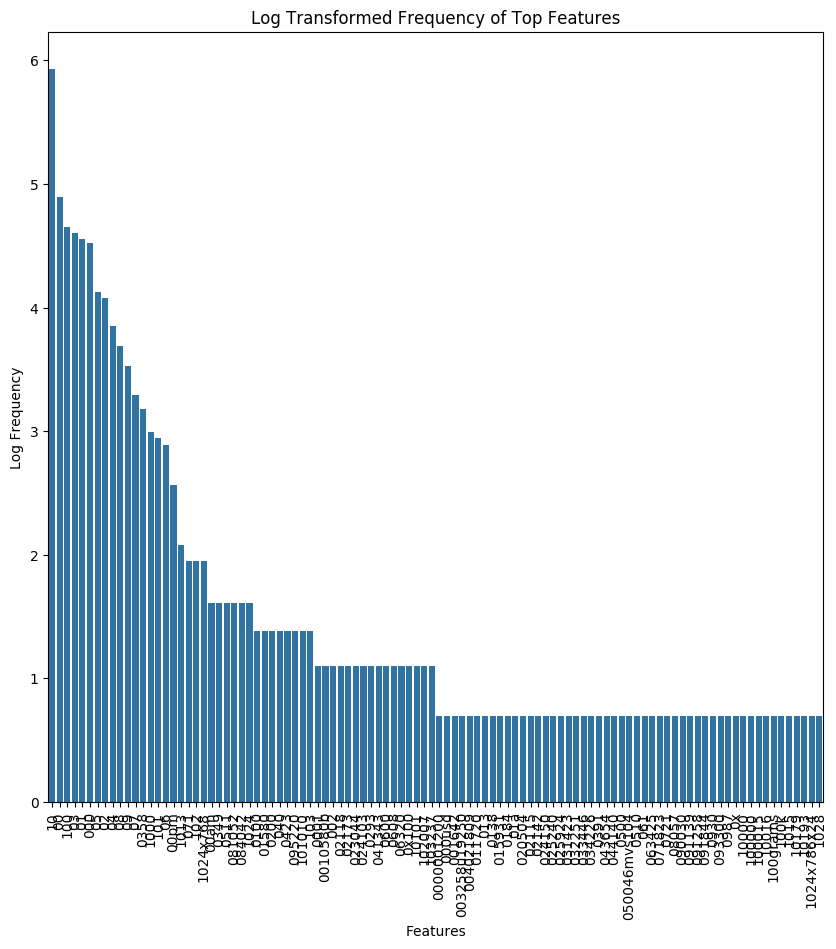

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]
k = 1
filtered_data = [(feature, freq) for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]

# Sort the data by frequency
filtered_data.sort(key=lambda x: x[1], reverse=True)
filtered_features_sorted, filtered_frequencies_sorted = zip(*filtered_data)

# 取對數
log_frequencies = np.log(filtered_frequencies_sorted)

# Plot
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features_sorted, y=log_frequencies)
g.set_xticklabels(filtered_features_sorted, rotation=90)
plt.xlabel('Features')
plt.ylabel('Log Frequency')
plt.title('Log Transformed Frequency of Top Features')
plt.show()


**Comment：** A log-transformed data is easier to observe than a non-log-transformed one because the original values had a wide range of values.

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

**Answer here**： Different categories will filter out different words and will also filter out different 1% and 5% of words.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41609589041096
Maximum Transaction Size : 2061
Standard Deviation Transaction Size : 152.701494376309
Variance in Transaction Sizes : 23357.742519208627
Sparsity : 0.9956374809858946


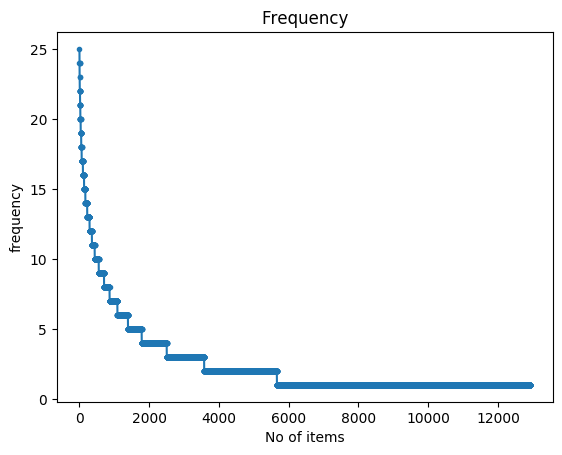

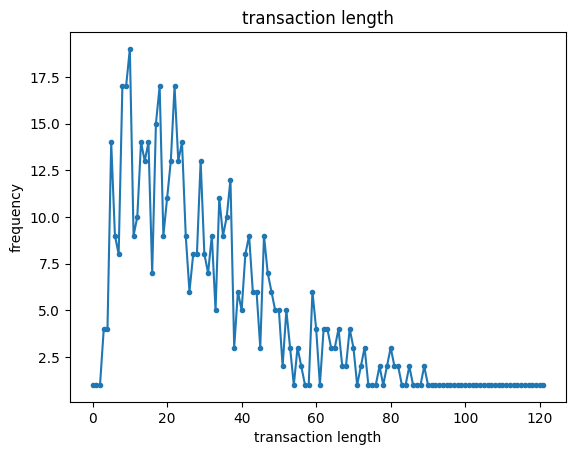

In [20]:
# Answer Here
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [25]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup_values = [3, 6, 9]
for minSup in minSup_values:
    print(f"Running FPGrowth with minSup={minSup}")
    obj = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()
    print(f"Total No of patterns for minSup={minSup}: " + str(len(frequentPatternsDF_comp_graphics)))
    print(f"Runtime for minSup={minSup}: " + str(obj.getRuntime()) + ' seconds')
    
    obj.save(f'freq_patterns_comp_graphics_minSup_{minSup}.txt')
    print("\n")


Running FPGrowth with minSup=3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=3: 6845
Runtime for minSup=3: 14.5962393283844 seconds


Running FPGrowth with minSup=6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=6: 1347
Runtime for minSup=6: 0.32695889472961426 seconds


Running FPGrowth with minSup=9
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=9: 660
Runtime for minSup=9: 0.09841465950012207 seconds




**Comment：** As the minSup setting decreases, more patterns will be found, but it will also increase the computation time. Same as the top-k setting, the higher the k value, the more patterns will be found, but it will also increase the computation time.

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [26]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [28]:
import pandas as pd



#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

In [30]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

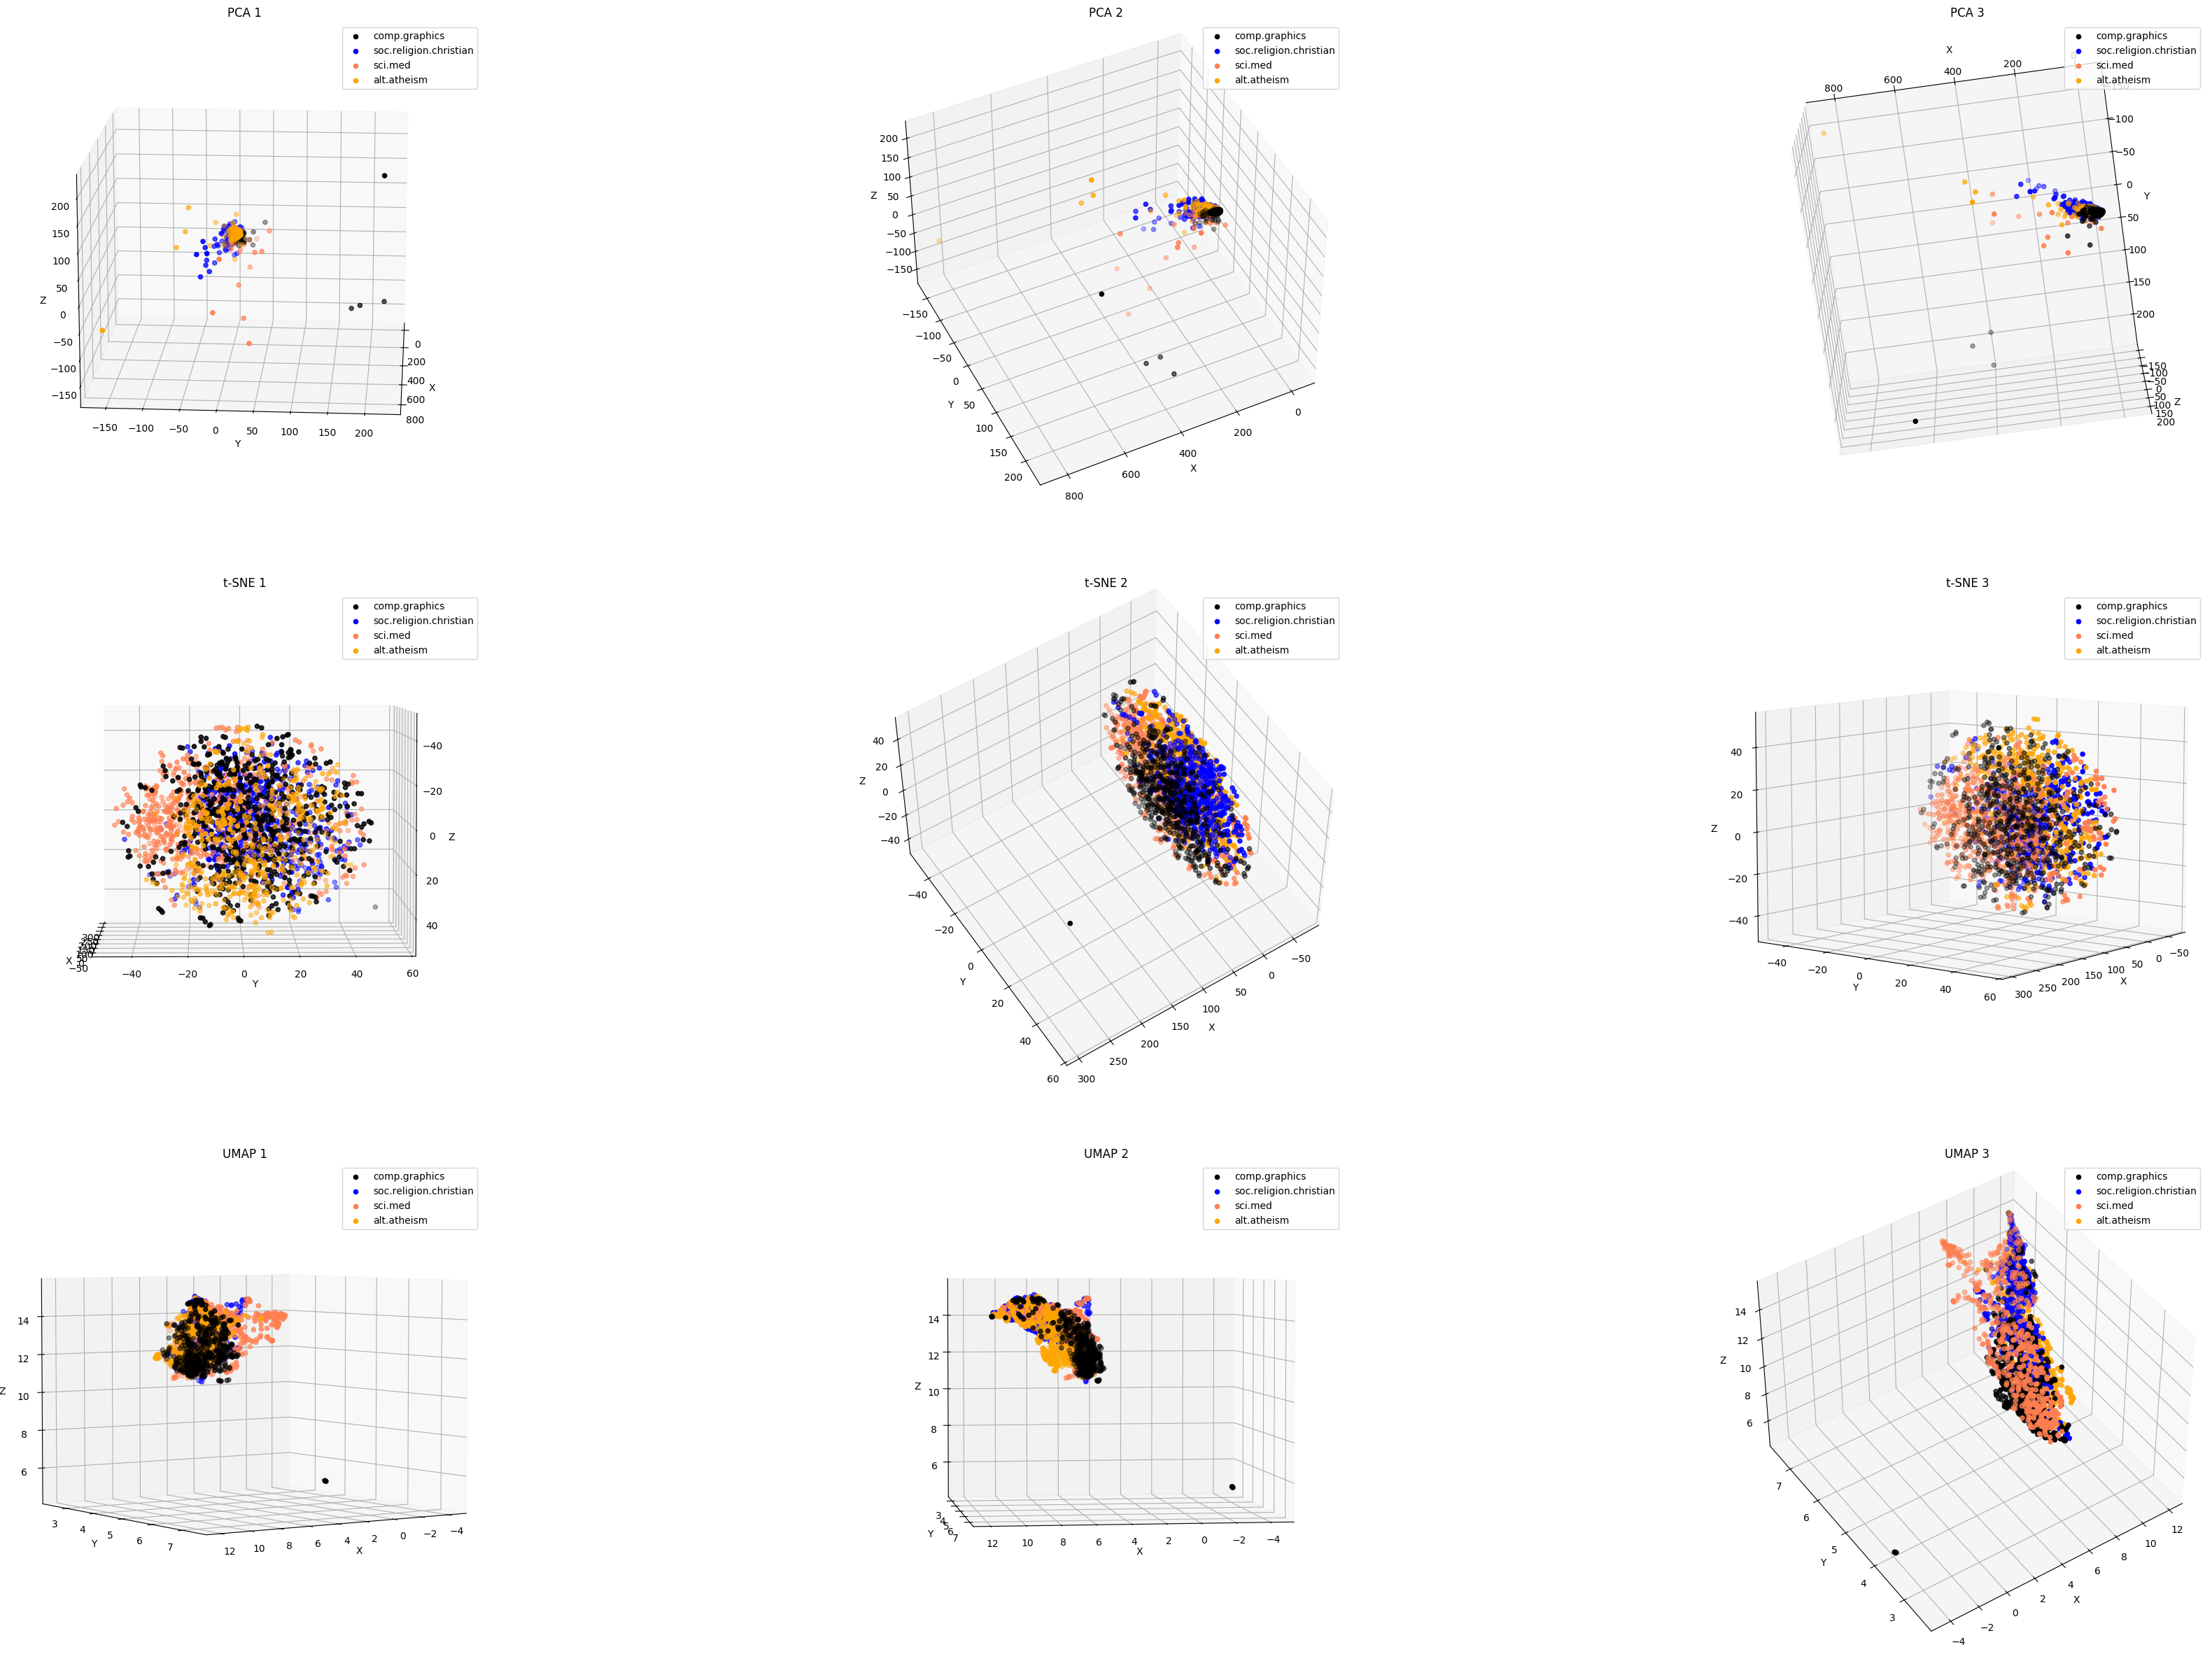

In [31]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


col = ['black', 'blue', 'coral', 'orange']
categories = X['category_name'].unique()


fig = plt.figure(figsize=(45, 30))  

def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# PCA
ax1 = fig.add_subplot(331, projection='3d')
plot_scatter_3d(ax1, X_pca_aug_3, 'PCA 1', elev=15, azim=4)
ax2 = fig.add_subplot(332, projection='3d')
plot_scatter_3d(ax2, X_pca_aug_3, 'PCA 2', elev=45, azim=64)
ax3 = fig.add_subplot(333, projection='3d')
plot_scatter_3d(ax3, X_pca_aug_3, 'PCA 3', elev=105, azim=82)

# t-SNE
ax4 = fig.add_subplot(334, projection='3d')
plot_scatter_3d(ax4, X_tsne_aug_3, 't-SNE 1', elev=184, azim=1)
ax5 = fig.add_subplot(335, projection='3d')
plot_scatter_3d(ax5, X_tsne_aug_3, 't-SNE 2', elev=54, azim=57)
ax6 = fig.add_subplot(336, projection='3d')
plot_scatter_3d(ax6, X_tsne_aug_3, 't-SNE 3', elev=8, azim=38)

# UMAP
ax7 = fig.add_subplot(337, projection='3d')
plot_scatter_3d(ax7, X_umap_aug_3, 'UMAP 1', elev=4, azim=56)
ax8 = fig.add_subplot(338, projection='3d')
plot_scatter_3d(ax8, X_umap_aug_3, 'UMAP 2', elev=3, azim=82)
ax9 = fig.add_subplot(339, projection='3d')
plot_scatter_3d(ax9, X_umap_aug_3, 'UMAP 3', elev=44, azim=236)

plt.show()


**Comment：** When presented in a 3D graph, UMAP has the best clustering effect, followed by PCA, and t-SNE is the worst. UMAP has the best presentation effect and the best clustering effect. 3D is better than 2D in presenting the distribution of data, but it is also more difficult to observe, and many angles may not be clear, so the perspective needs to be adjusted constantly.

In [32]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)


LabelBinarizer()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [33]:
# Answer here
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [34]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   
9                 sci.med  [From, :, libman, @, hsc.usc.edu, (, Marlena, ...   

                                      tokenized_text bin_category_name  
0  {correct, Thanks, We, M.P.Collier@uk.ac.city, ...      [0, 0, 0, 0]  
1  {is, it, as, have, else, cell, appreciated., S...      [0, 0, 0, 0]  
2  {take, >on, is, have, realized, action,, off, ...      [0, 0, 0, 0]  
3  {Most, after, Can, der, Rijksuniversiteit, NL,...      [0, 0, 0, 0]  
4  {main, are, that, who, is, died, as, it, his, ...      [0, 0, 0, 0]  
5  {Virgilio, are, very, that, infallible., gradu...      [0, 0, 0, 0]  
6  {ourselves, fisher), are, very, that, We, is, ...      [0, 0, 0, 0]  
7  {naturally, hair, We, is, vitamin, miserable, ...      [0, 0, 0, 0]  
8  {intellect,, are, Pittsburgh, that, is, Reply-...      [0, 0, 0, 0]  
9  {very, that, pain, doesn't, manage, 64, who, i...      [0, 0, 0, 0]

**Comment：** The generated bin_category_name values are all [0, 0, 0, 0], so you should use the category attribute for the conversion to get the correct result.

---

### **Step 2**

In [1]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")


In [2]:
ds = ds['train']

In [3]:
ds

Dataset({
    features: ['sentiment', 'comment'],
    num_rows: 1500
})

In [4]:
ds[0:5]

{'sentiment': ['not nostalgia',
  'nostalgia',
  'nostalgia',
  'not nostalgia',
  'nostalgia'],
 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
  'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel',
  'I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.',
  '30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I

In [5]:
# check the type of the dataset
print(type(ds))

<class 'datasets.arrow_dataset.Dataset'>


In [6]:
len(ds)

1500

In [7]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(ds, columns= ['comment'])
X[0:5]


comment
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...
2  I have most of Mr. Reeves songs.  Always love ...
3  30 day leave from 1st tour in Viet Nam to conv...
4  listening to his songs reminds me of my mum wh...

In [8]:
target = pd.DataFrame.from_records(ds, columns= ['sentiment'])
target[0:5]

sentiment
0  not nostalgia
1      nostalgia
2      nostalgia
3  not nostalgia
4      nostalgia

In [9]:
# add category to the dataframe
X['sentiment'] = target['sentiment']
X[0:5]


comment      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia

In [10]:
X['category'] = X['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
X[0:5]

comment      sentiment  category
0  He was a singer with a golden voice that I lov...  not nostalgia         0
1  The mist beautiful voice ever I listened to hi...      nostalgia         1
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0
4  listening to his songs reminds me of my mum wh...      nostalgia         1

In [11]:
X['category']

0       0
1       1
2       1
3       0
4       1
       ..
1495    0
1496    0
1497    0
1498    1
1499    1
Name: category, Length: 1500, dtype: int64

In [12]:
X.iloc[10:20]

comment      sentiment  category
10  ill bet if they begin to play this song on the...  not nostalgia         0
11  this song came out my senior year in high scho...      nostalgia         1
12  A few years back picked up at a charity shop a...      nostalgia         1
13  I am 47 and grew up on songs of this type.  I ...      nostalgia         1
14  I remember my father used to listen to Jim Ree...  not nostalgia         0
15  This song/singer has very special meaning as i...  not nostalgia         0
16  Sir. Jim Reeves!! I love him. I'm 29 years old...  not nostalgia         0
17  It is a memory lane, I grew up listening to Ji...      nostalgia         1
18  My Grandparents had a pub in the 1970's, this ...      nostalgia         1
19  A fine tune from Gentleman Jim. The tunes on m...      nostalgia         1

In [13]:
print(X[X['sentiment']=='nostalgia'].iloc[::10])

                                                comment  sentiment  category
1     The mist beautiful voice ever I listened to hi...  nostalgia         1
18    My Grandparents had a pub in the 1970's, this ...  nostalgia         1
32    I remember my Mom listening to Jim over and ov...  nostalgia         1
50    If I remember correctly, this song came out af...  nostalgia         1
71    Gosh does this bring back memories. Nearly eve...  nostalgia         1
...                                                 ...        ...       ...
1406  The skating rink! Ah... Good times! Brings bac...  nostalgia         1
1423  I love you more than I can say. It's the words...  nostalgia         1
1439  January 2019...I remember sitting in the back ...  nostalgia         1
1456  Brings sweet memories to  mind. Warms my heart...  nostalgia         1
1478         love this song bring back good memories...  nostalgia         1

[75 rows x 3 columns]


In [14]:
X.isnull()

comment  sentiment  category
0       False      False     False
1       False      False     False
2       False      False     False
3       False      False     False
4       False      False     False
...       ...        ...       ...
1495    False      False     False
1496    False      False     False
1497    False      False     False
1498    False      False     False
1499    False      False     False

[1500 rows x 3 columns]

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [16]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "category"])

In [17]:
dummy_series

comment     dummy_record
category               1
dtype: object

In [18]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [19]:
len(result_with_series)

1501

In [20]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category  
0  The amoung of missing records is:   
1                                   0

In [21]:
dummy_dict = [{'comment': 'dummy_record',
               'category': 1
              }]

In [22]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [23]:
len(X)

1501

In [24]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category  
0  The amoung of missing records is:   
1                                   0

In [25]:
X.dropna(inplace=True)

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [27]:
len(X)

1500

In [28]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [29]:
sum(X.duplicated())

1

In [30]:
sum(X.duplicated('comment'))

1

In [31]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [32]:
len(X)

1498

In [33]:
X_sample = X.sample(n=800) 

In [34]:
len(X_sample)

800

In [35]:
X_sample[0:4]

comment  sentiment  category
1443  Nostalgia of 80s when I was young & being prou...  nostalgia         1
189   Love this song so much, no one can sing it lik...  nostalgia         1
1451  Brings back memories... summer of '82, 14 year...  nostalgia         1
49    Thank you so much to everyone who shares Jim. ...  nostalgia         1

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

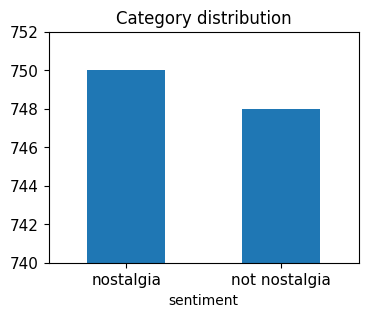

In [36]:
print(X.sentiment.value_counts())

X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [740, 752],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

sentiment
nostalgia        409
not nostalgia    391
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

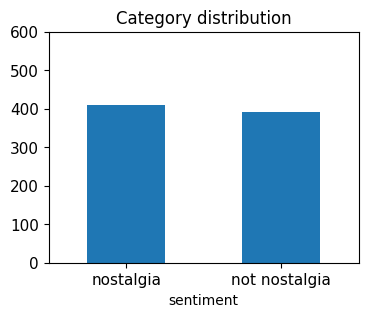

In [37]:
print(X_sample.sentiment.value_counts())

X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

In [38]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


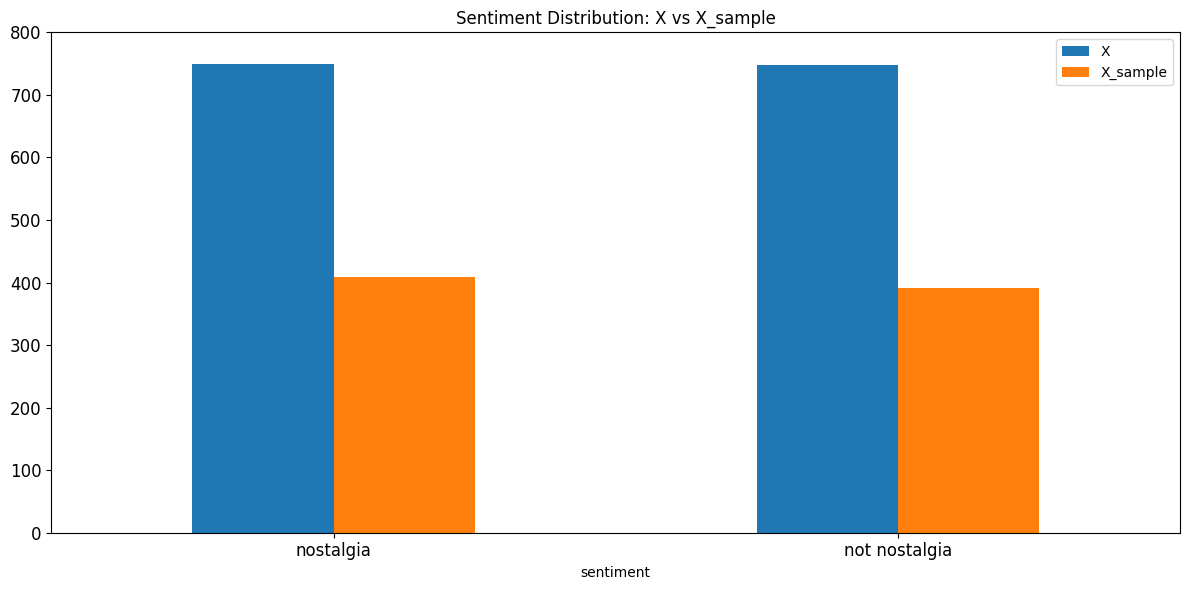

In [39]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt


X_sentiment_counts = X.sentiment.value_counts()
X_sample_sentiment_counts = X_sample.sentiment.value_counts()


df_combined = pd.DataFrame({'X': X_sentiment_counts, 'X_sample': X_sample_sentiment_counts})
df_combined = df_combined.fillna(0)
plt.style.use('_classic_test_patch')

df_combined.plot(kind='bar', 
                 figsize=(12, 6), 
                 rot=0, 
                 fontsize=12, 
                 title='Sentiment Distribution: X vs X_sample')

plt.ylim([0, max(max(X_sentiment_counts), max(X_sample_sentiment_counts)) + 50])
plt.tight_layout()
plt.show()

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [43]:
X[0:4]

comment      sentiment  category  \
0  He was a singer with a golden voice that I lov...  not nostalgia         0   
1  The mist beautiful voice ever I listened to hi...      nostalgia         1   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [44]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) 
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [46]:
count_vect.get_feature_names_out()[200]

'affair'

In [47]:
count_vect.get_feature_names_out()[1500]

'grandfather'

In [48]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [49]:
X_counts.shape

(1498, 3730)

In [50]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [51]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [52]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [53]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [54]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

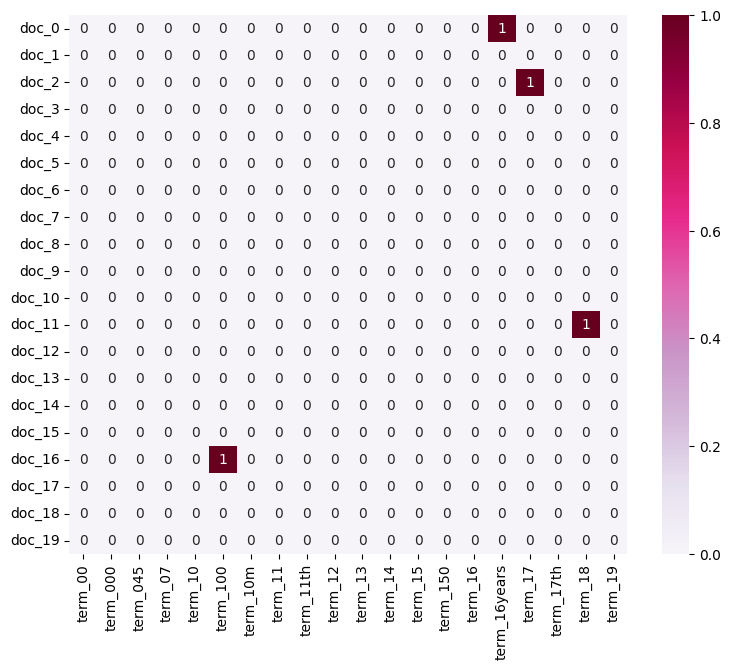

In [55]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [56]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [57]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [58]:
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

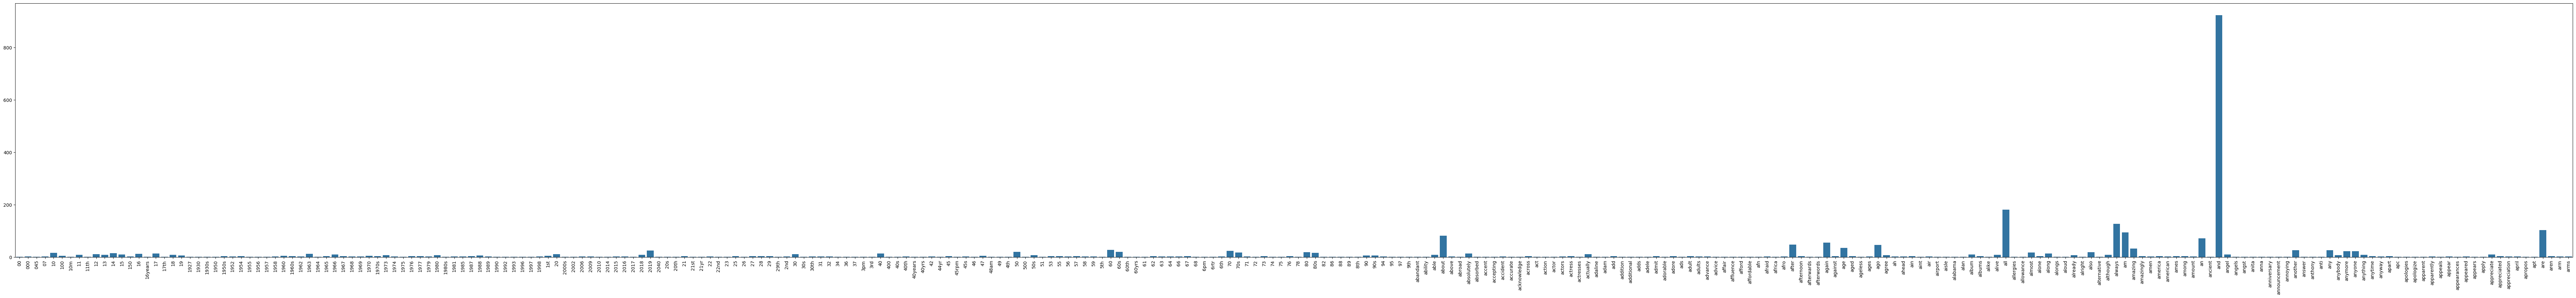

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [60]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'x': count_vect.get_feature_names_out()[:300],
    'y': term_frequencies[:300]
})

fig = px.bar(df, x='x', y='y')
fig.update_layout(xaxis_tickangle=90)  
fig.show()

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\2751343142.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



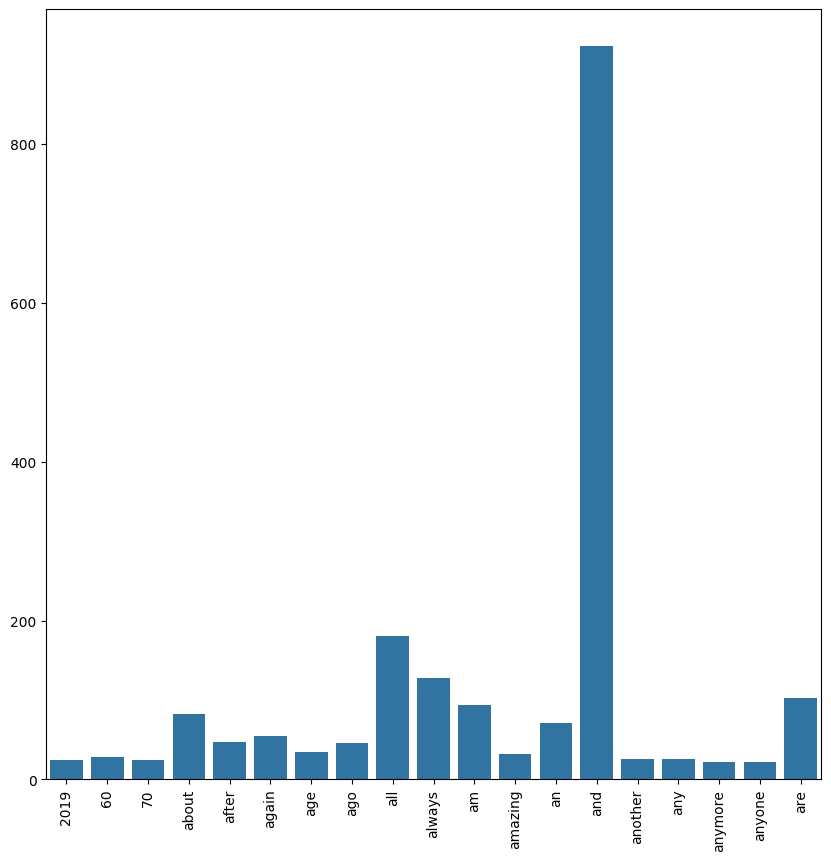

In [61]:

filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]

k = 20
filtered_features = [feature for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]
filtered_frequencies = [freq for freq in filtered_frequencies if freq > k]

plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features, y=filtered_frequencies)
g.set_xticklabels(filtered_features, rotation=90)
plt.show()

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\3936148531.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



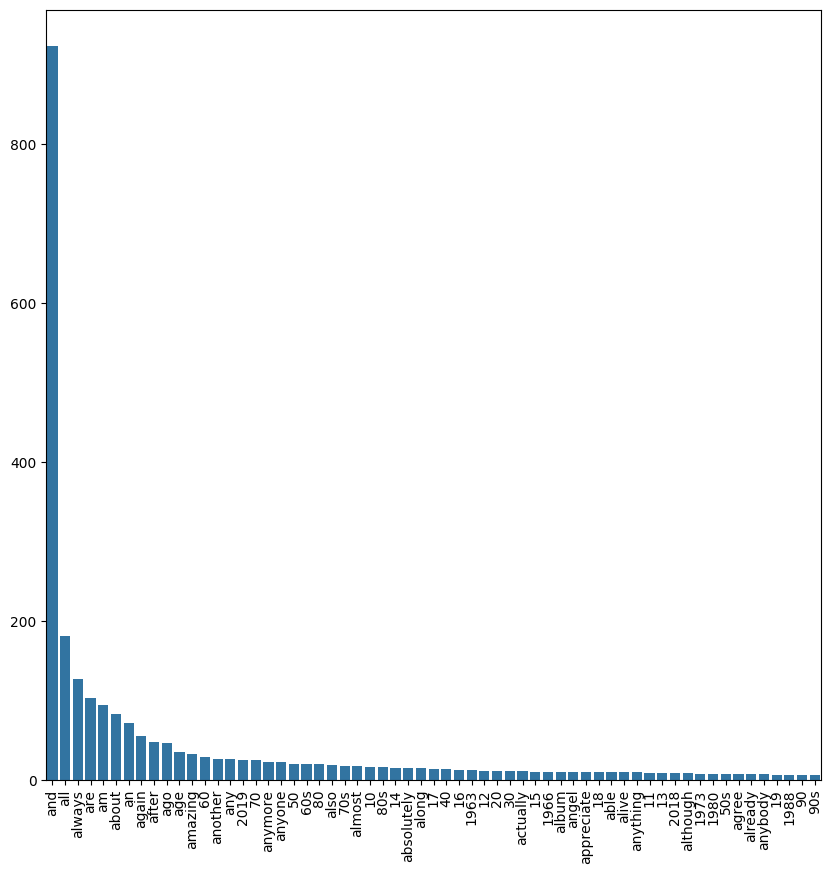

In [62]:
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]
k = 5
filtered_data = [(feature, freq) for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]

filtered_data.sort(key=lambda x: x[1], reverse=True)
filtered_features_sorted, filtered_frequencies_sorted = zip(*filtered_data)

plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features_sorted, y=filtered_frequencies_sorted)
g.set_xticklabels(filtered_features_sorted, rotation=90)
plt.show()


In [63]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

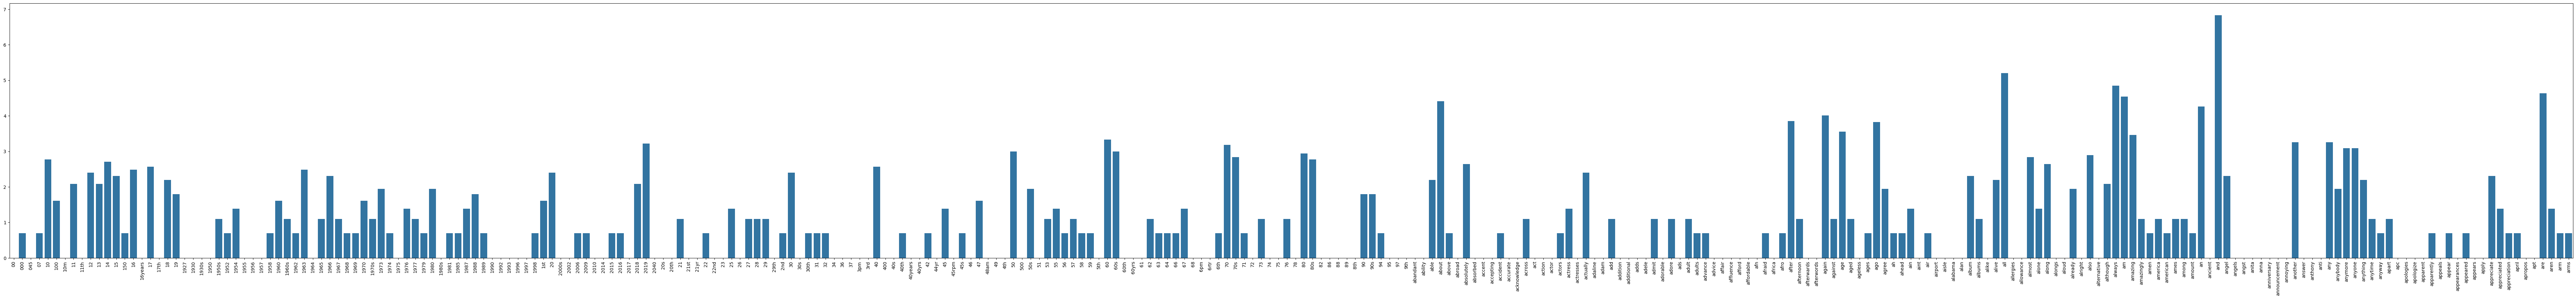

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment'].unique()  
category_dfs = {}  

for category in categories:
    category_dfs[category] = X[X['sentiment'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  
    X_counts = count_vect.fit_transform(df['comment'])  
    
    words = count_vect.get_feature_names_out()
    
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [66]:
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

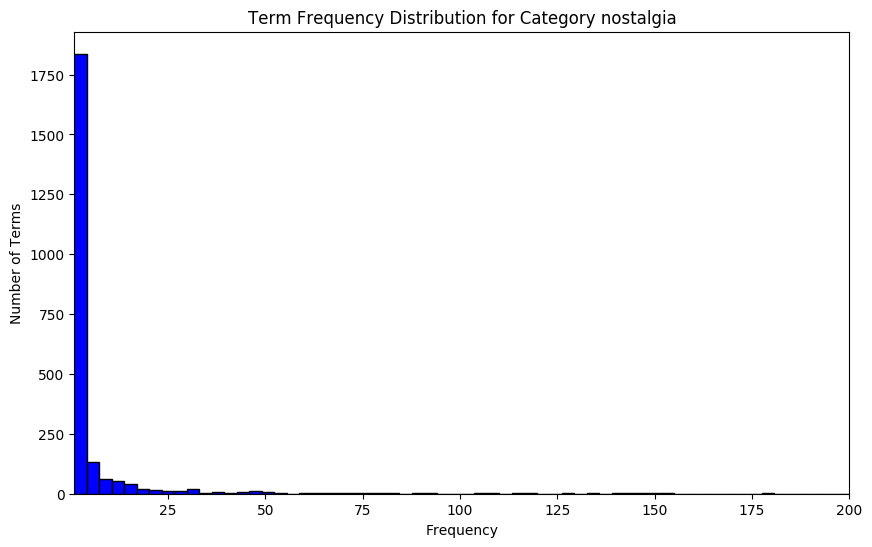

In [67]:
category_number=1 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=200, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [68]:
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)[::-1] 
sorted_counts = np.sort(word_counts)[::-1]  

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [69]:
sorted_counts

array([643, 566, 545, ...,   1,   1,   1])

In [70]:
sorted_indices

array([2011, 1403, 2026, ..., 2279, 2281, 2282])

In [71]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) 

np.int64(643)

In [72]:
category_number=1 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)  
sorted_counts = word_counts[sorted_indices]  

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yo', 'yet', 'yester', 'yeas', 'yearn', 'yeah', '1952', '1950', '1969', '1964', 'lp', 'safety', 'safer', 'saddest', 'seeing', 'lou', 'proud', 'protest', '2002', 'yup', '1927', '11th']


In [73]:
sorted_counts

array([  1,   1,   1, ..., 545, 566, 643])

In [74]:
sorted_indices

array([2282, 2281, 2279, ..., 2026, 1403, 2011])

In [75]:
category_number=1

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
classic     23
wish        24
any         25
          ... 
of         361
to         394
this       451
and        451
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

07  10  11  12  13  14  15  16  17  18  ...  yesterday  yokel  younger  \
0     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
1     0   0   0   0   0   0   0   0   1   0  ...          0      0        0   
2     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
3     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
4     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...        ...    ...      ...   
745   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
746   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
747   0   0   0   0   1   0   0   0   0   0  ...          0      0        0   
748   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
749   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

In [76]:
from PAMI.extras.DF2DB import DenseFormatDF as db

for category in term_document_dfs:
    category_safe = category.replace('.', '_')
    
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


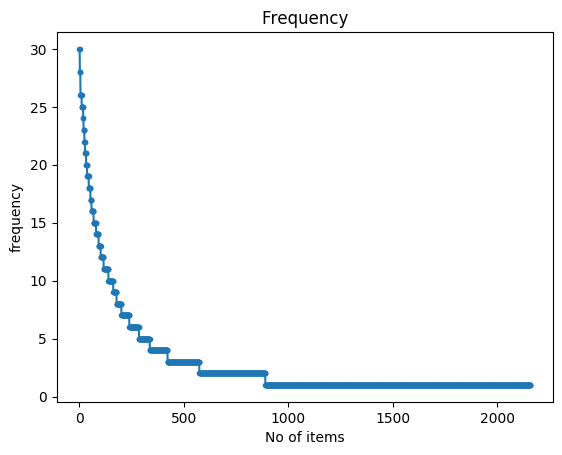

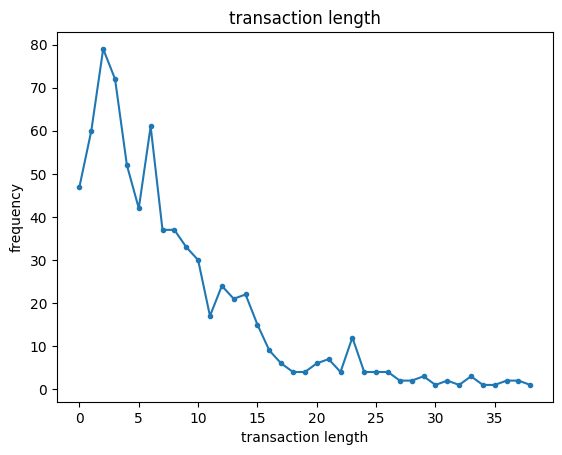

In [77]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.966526146738824
Variance in Transaction Sizes : 35.64728296168002
Sparsity : 0.9965636266853979


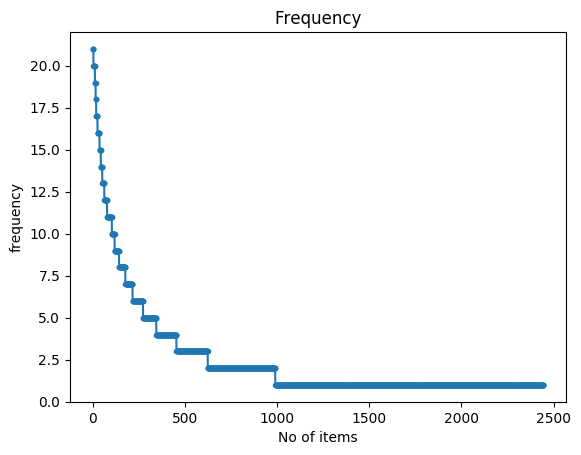

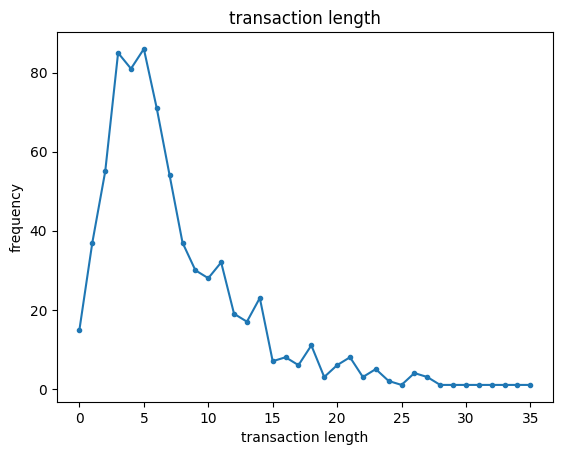

In [78]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [79]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) 
print('Runtime: ' + str(obj1.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 938
Runtime: 0.014383077621459961


In [80]:
obj1.save('td_freq_db_nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        forgot        3
1            mr        3
2    appreciate        3
3         death        3
4     death jim        3
..          ...      ...
933        ever       28
934       would       28
935          go       28
936       takes       30
937    favorite       30

[938 rows x 2 columns]

In [81]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) 
print('Runtime: ' + str(obj2.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.010995626449584961


In [82]:
obj2.save('td_freq_db_not nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0       emotional        3
1             fan        3
2              30        3
3        blessing        3
4        december        3
..            ...      ...
725         loved       21
726          them       21
727    them every        4
728        lyrics       21
729  lyrics every        3

[730 rows x 2 columns]

In [83]:
import pandas as pd

dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
624      would       28
623       ever       28
620       wish       26
617         or       26
616       such       26
..         ...      ...
16   australia        3
15        disc        3
14   favourite        3
13        army        3
12       plane        3

[1042 rows x 2 columns]
Number of patterns discarded: 626


In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  
terms = count_vect.get_feature_names_out()  

X['tokenized_comment'] = X['comment'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
0      0    0    0   0   0    0    0   0     0   0  ...       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0   
2      0    0    0   0   0    0    0   0     0   0  ...       1   
3      0    0    0   0   0    0    0   0     0   0  ...       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
0                  0          0           0        0          0     0   
1                  0          0           0        0          0     0   
2                  0          0           0        0          0     0   
3                  0          0           0        0          0     0   
4                  0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1495               0          0           0        0          0     0   
1496               0          0           0        0          0     0   
1497               0          0           0        0          0     0   
1498               0          0           0        0          0     0   
1499               0          0           0        0          0     0   

      favourite  army  plane  
0             0     0      0  
1             0     0      0  
2             0     0      0  
3             0     0      0  
4             0     0      0  
...         ...   ...    ...  
1495          0     0      0  
1496          0     0      0  
1497          0     0      0  
1498          0     0      0  
1499          0     0      0  

[1498 rows x 4772 columns]

In [85]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [86]:
X_pca_tdm.shape

(1498, 2)

In [87]:
X_tsne_tdm.shape

(1498, 2)

In [88]:
X_umap_tdm.shape

(1498, 2)

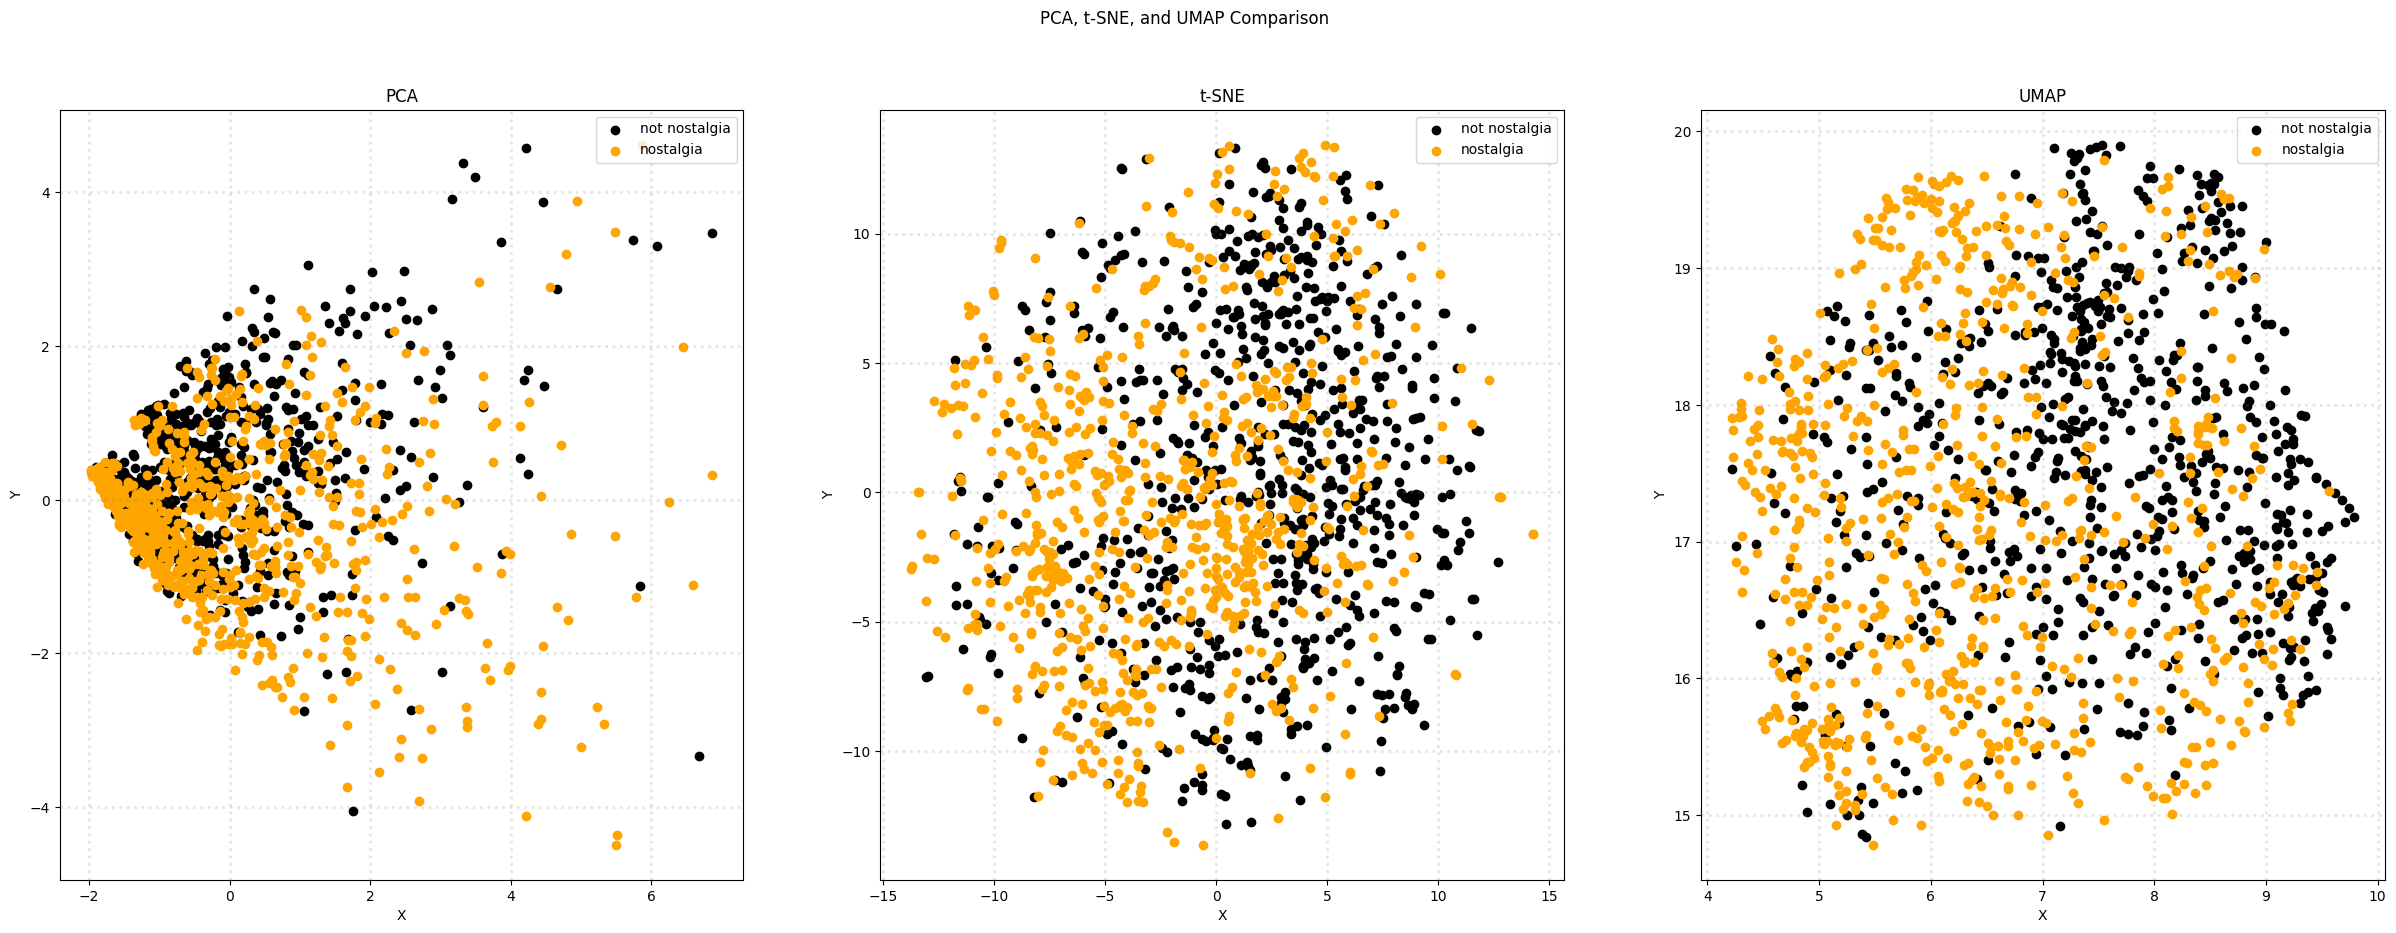

In [89]:
# Plot the results in subplots
col = ['black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [90]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

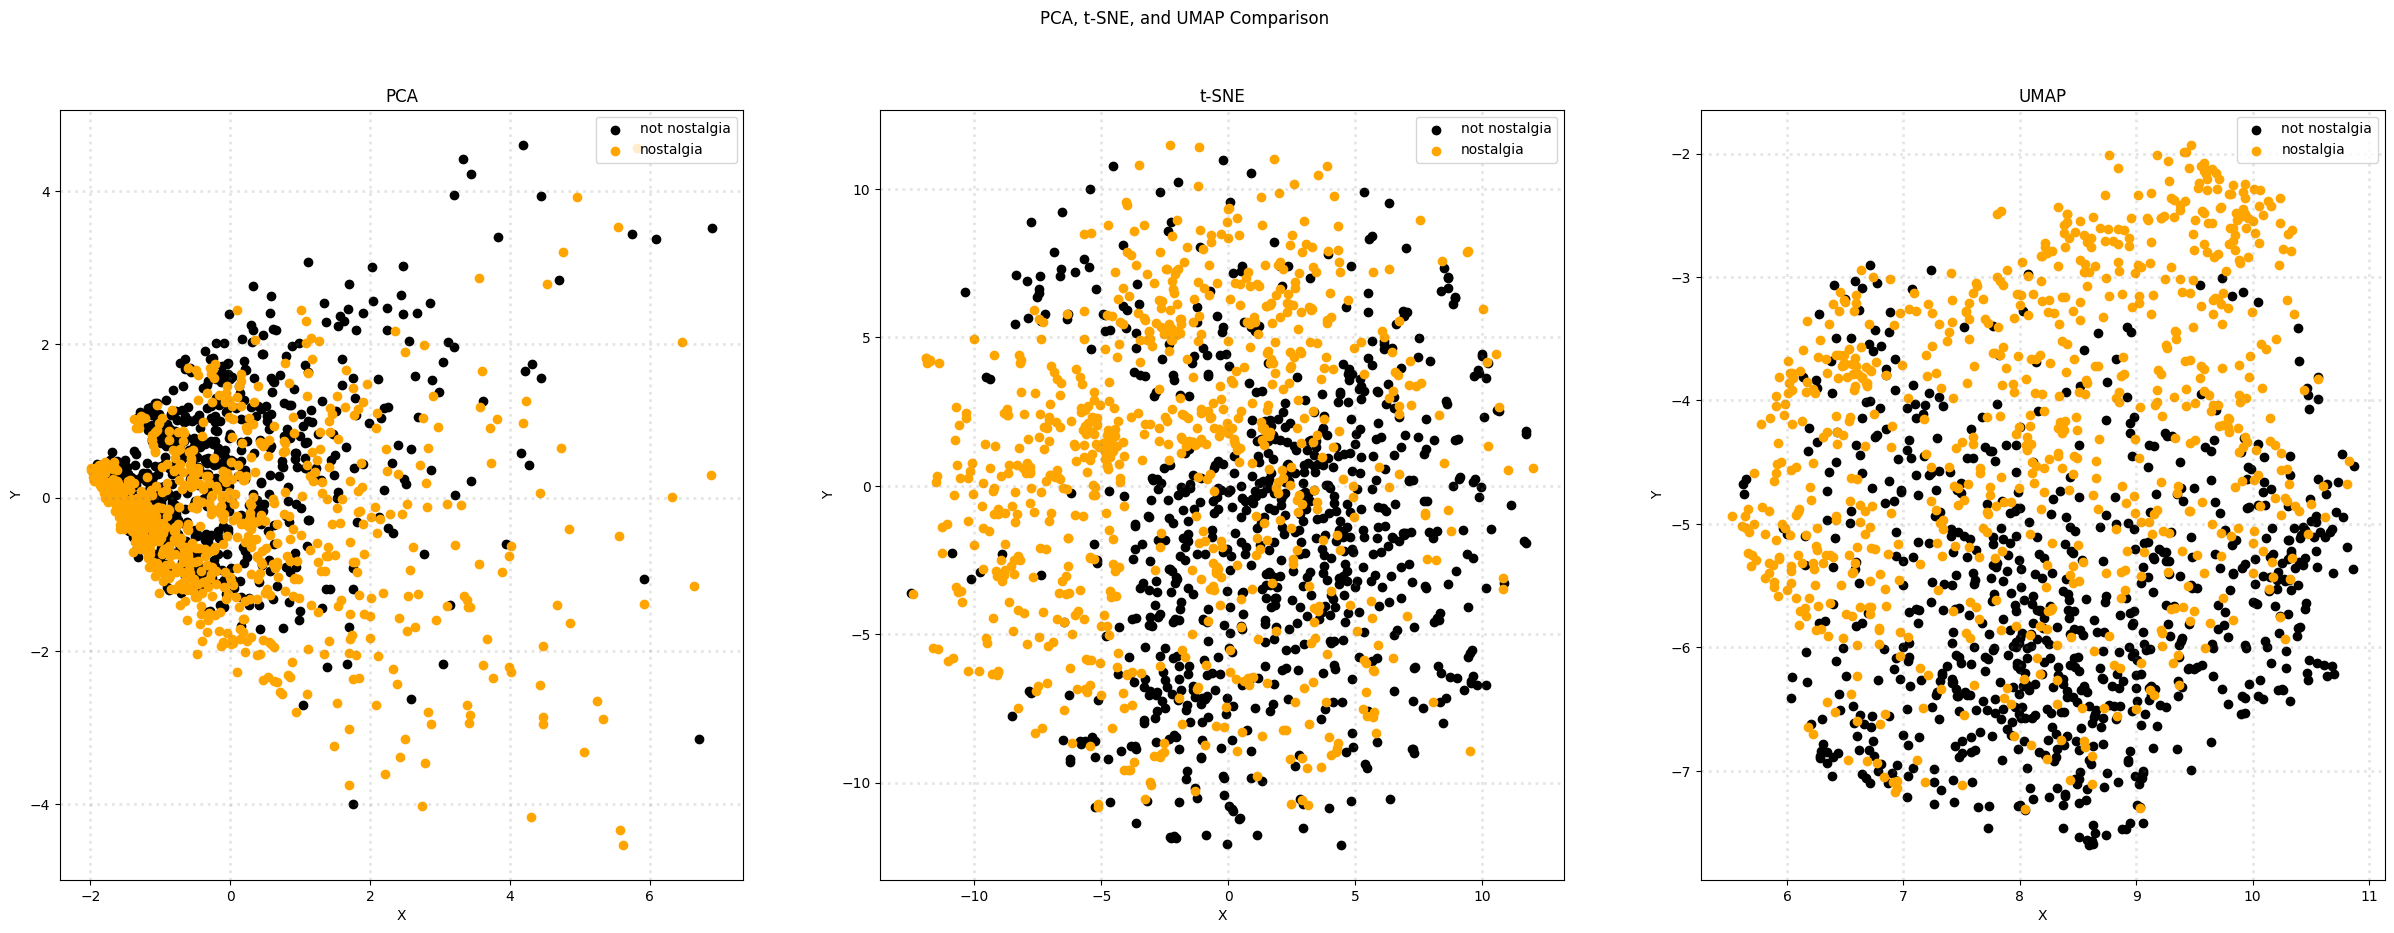

In [91]:
# Plot the results in subplots
col = ['black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [92]:
X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

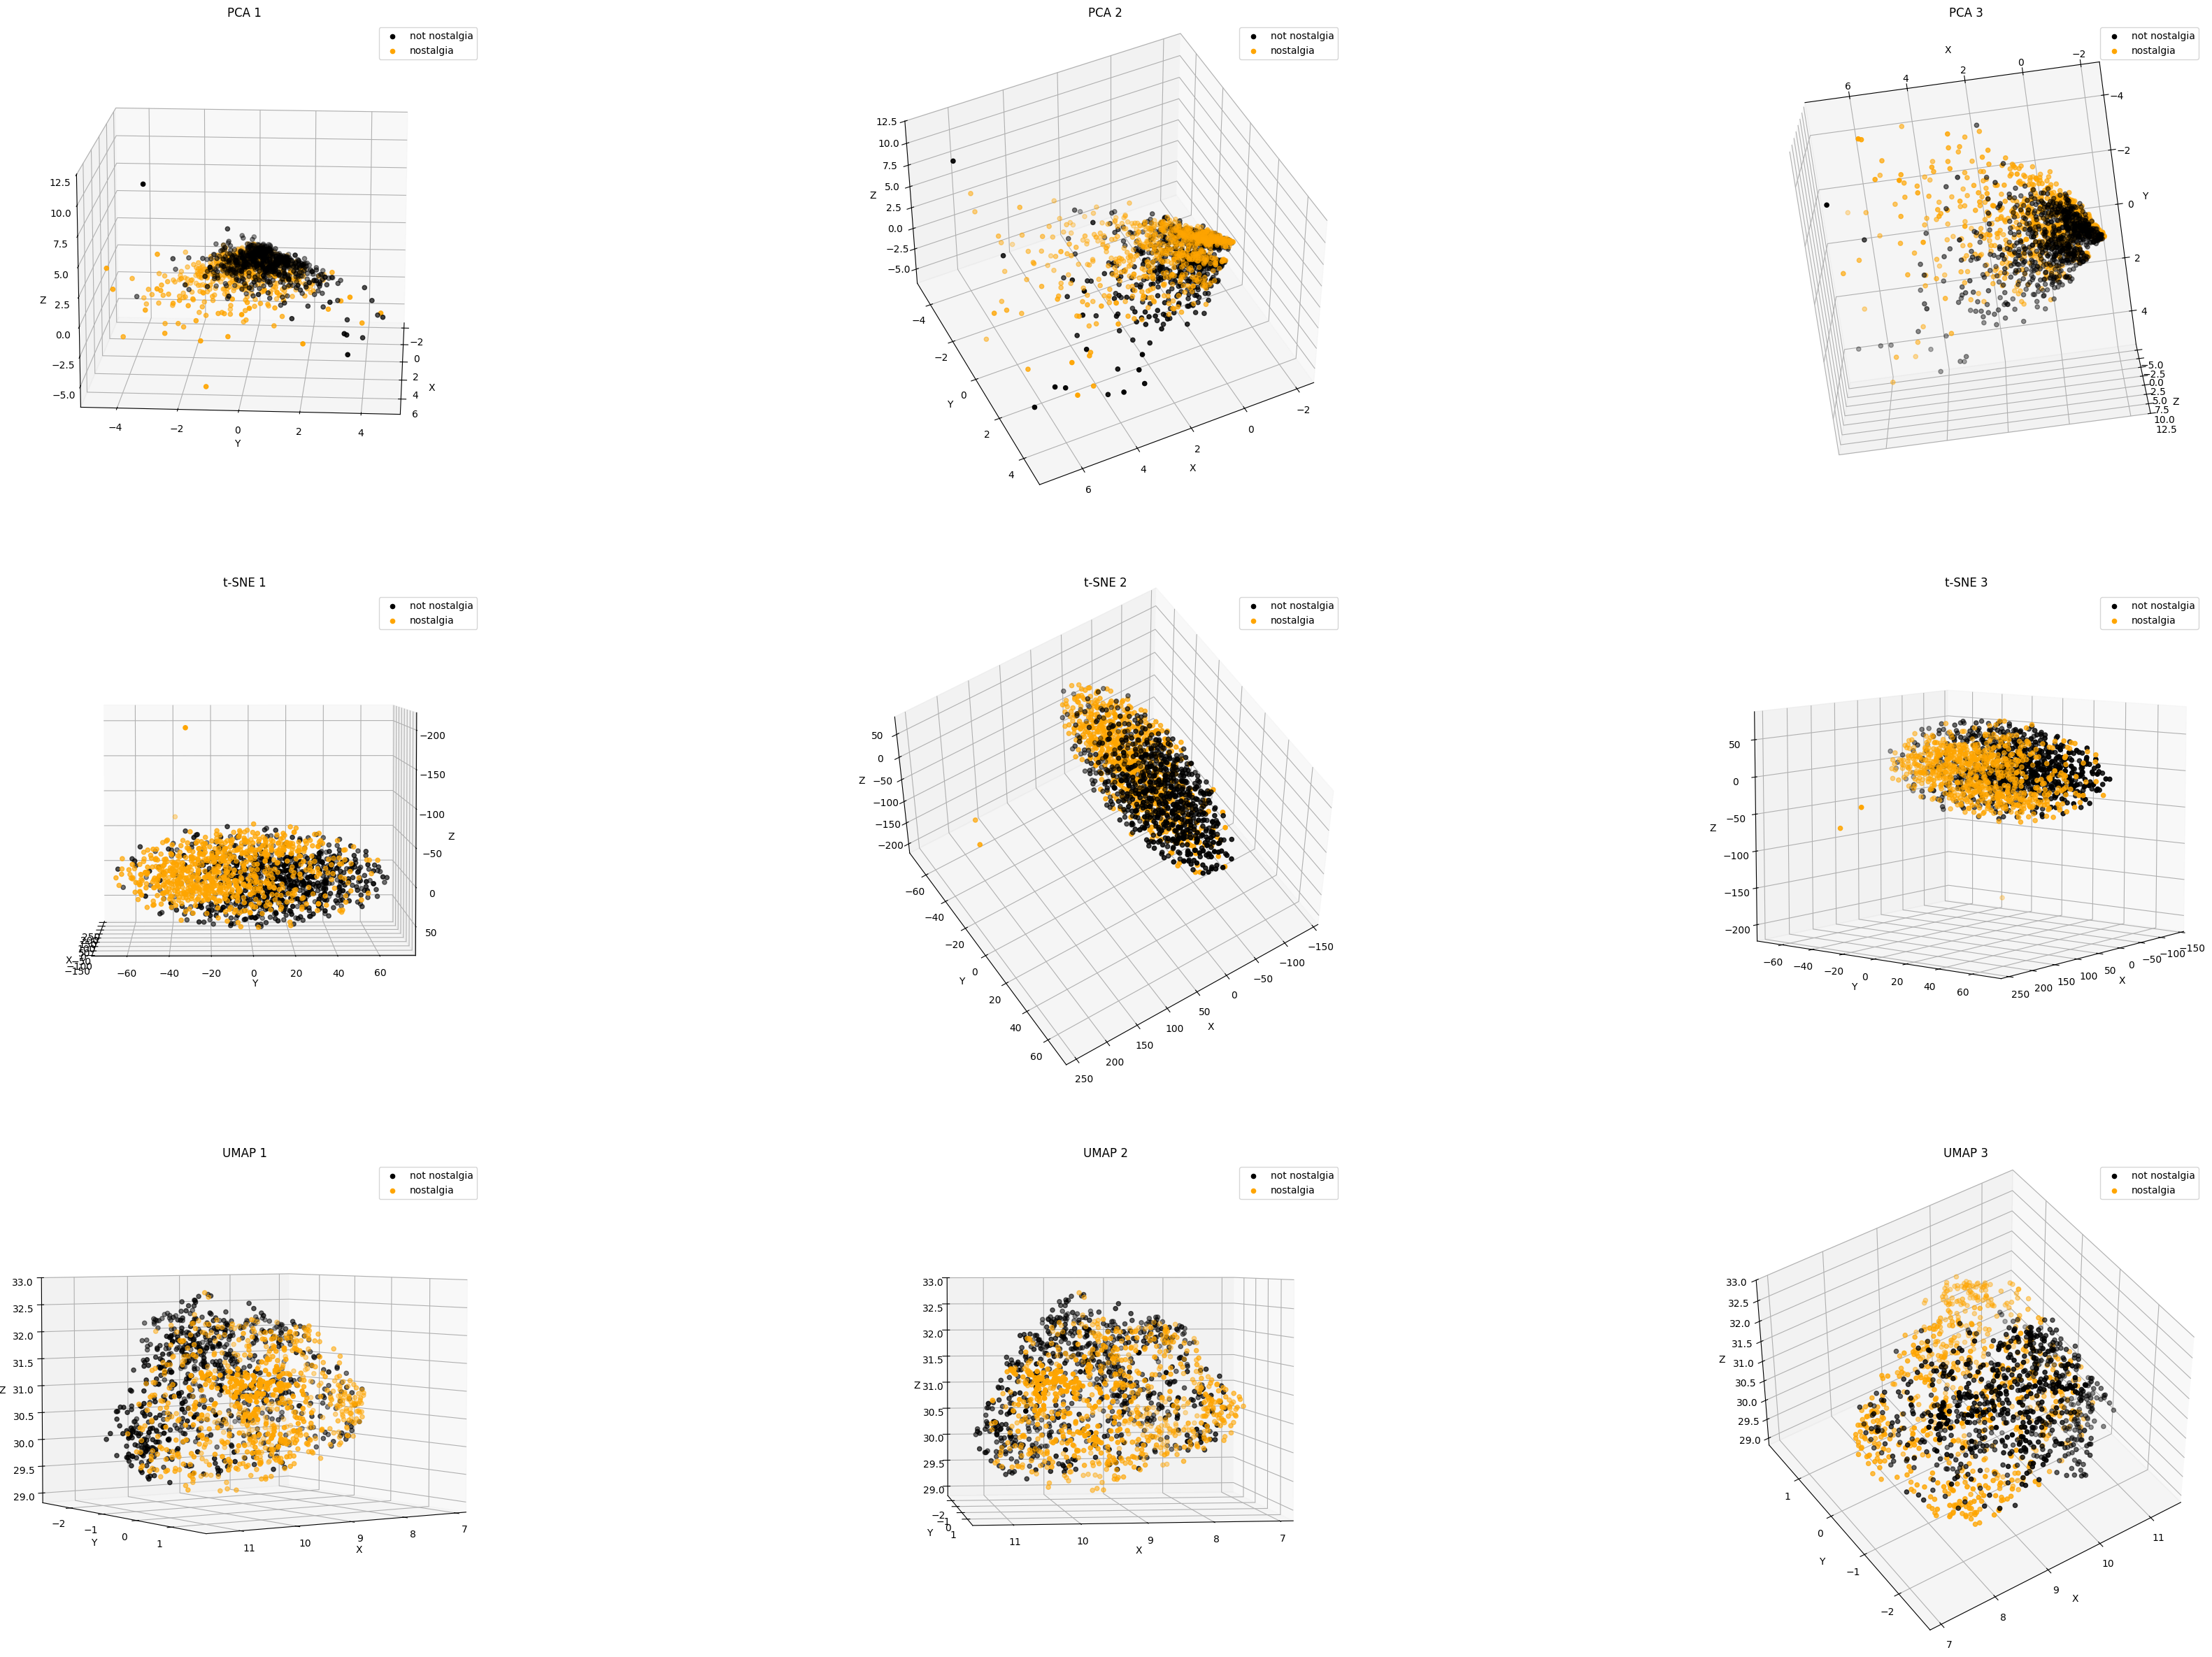

In [93]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


col = ['black', 'orange']
categories = X['sentiment'].unique()


fig = plt.figure(figsize=(45, 30))  

def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# PCA
ax1 = fig.add_subplot(331, projection='3d')
plot_scatter_3d(ax1, X_pca_aug_3, 'PCA 1', elev=15, azim=4)
ax2 = fig.add_subplot(332, projection='3d')
plot_scatter_3d(ax2, X_pca_aug_3, 'PCA 2', elev=45, azim=64)
ax3 = fig.add_subplot(333, projection='3d')
plot_scatter_3d(ax3, X_pca_aug_3, 'PCA 3', elev=105, azim=82)

# t-SNE
ax4 = fig.add_subplot(334, projection='3d')
plot_scatter_3d(ax4, X_tsne_aug_3, 't-SNE 1', elev=184, azim=1)
ax5 = fig.add_subplot(335, projection='3d')
plot_scatter_3d(ax5, X_tsne_aug_3, 't-SNE 2', elev=54, azim=57)
ax6 = fig.add_subplot(336, projection='3d')
plot_scatter_3d(ax6, X_tsne_aug_3, 't-SNE 3', elev=8, azim=38)

# UMAP
ax7 = fig.add_subplot(337, projection='3d')
plot_scatter_3d(ax7, X_umap_aug_3, 'UMAP 1', elev=4, azim=56)
ax8 = fig.add_subplot(338, projection='3d')
plot_scatter_3d(ax8, X_umap_aug_3, 'UMAP 2', elev=3, azim=82)
ax9 = fig.add_subplot(339, projection='3d')
plot_scatter_3d(ax9, X_umap_aug_3, 'UMAP 3', elev=44, azim=236)

plt.show()


In [94]:
from sklearn import preprocessing

In [95]:
mlb = preprocessing.LabelBinarizer()

In [96]:
mlb.fit(X.category)

LabelBinarizer()

In [97]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [98]:
X[0:9]

comment      sentiment  category  \
0  He was a singer with a golden voice that I lov...  not nostalgia         0   
1  The mist beautiful voice ever I listened to hi...      nostalgia         1   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0   
4  listening to his songs reminds me of my mum wh...      nostalgia         1   
5  Every time I heard this song as a child, I use...      nostalgia         1   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia         1   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia         1   
8           Wherever you  are you always in my heart  not nostalgia         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_category  
0  {singer, relaxed,, in, feel, Although, those, ...          [0]  
1  {Never, listened, singing, mist, when, forgott...          [1]  
2  {Always, around., comforting, early., how, who...          [1]  
3  {tour, greatest, in, 30, convince, me", who, t...          [0]  
4  {me, everyday, his, of, mum, listening, who, s...          [1]  
5  {me, used, heard, Now, funerals., Jim, child,,...          [1]  
6  {me, teenager, then,, in, how, listening, when...          [1]  
7  {me, since, i, puts, in, nostalgic, Jim, with,...          [1]  
8        {in, always, are, Wherever, heart, you, my}          [0]

In [99]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [100]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [101]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\1433203154.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\1433203154.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\1433203154.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_16716\1433203154.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [103]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [104]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [105]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [106]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [107]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [108]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
890    0    0    0   0   0    0    0   0     0   0  ...       0   
1397   0    0    0   0   0    0    0   0     0   0  ...       0   
709    0    0    0   0   0    0    0   0     0   0  ...       0   
1273   0    0    0   0   0    0    0   0     0   0  ...       0   
940    0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1132   0    0    0   0   0    0    0   0     0   0  ...       0   
1296   0    0    0   0   0    0    0   0     0   0  ...       0   
862    0    0    0   0   0    0    0   0     0   0  ...       0   
1461   0    0    0   0   0    0    0   0     0   0  ...       0   
1128   0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
890                0          0           0        0          0     0   
1397               0          0           0        0          0     0   
709                0          0           0        0          0     0   
1273               0          0           0        0          0     0   
940                0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1132               0          0           0        0          0     0   
1296               0          0           0        0          0     0   
862                0          0           0        0          0     0   
1461               0          0           0        0          0     0   
1128               0          0           0        0          0     0   

      favourite  army  plane  
890           0     0      0  
1397          0     0      0  
709           0     0      0  
1273          0     0      0  
940           0     0      0  
...         ...   ...    ...  
1132          0     0      0  
1296          0     0      0  
862           0     0      0  
1461          0     0      0  
1128          0     0      0  

[1048 rows x 4772 columns]

In [109]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
1035   0    0    0   0   0    0    0   0     0   0  ...       0   
1307   0    0    0   0   0    0    0   0     0   0  ...       0   
1437   0    0    0   0   0    0    0   0     0   0  ...       0   
1491   0    0    0   0   0    0    0   0     0   0  ...       0   
790    0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1231   0    0    0   0   0    0    0   0     0   0  ...       0   
1275   0    0    0   0   0    0    0   0     0   0  ...       0   
484    0    0    0   0   0    0    0   0     0   0  ...       0   
1329   0    0    0   0   0    0    0   0     0   0  ...       0   
201    0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
1035               0          0           0        0          0     0   
1307               0          0           0        0          0     0   
1437               0          0           0        0          0     0   
1491               0          0           0        0          0     0   
790                0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1231               0          0           0        0          0     0   
1275               0          0           0        0          0     0   
484                0          0           0        0          0     0   
1329               0          0           0        0          0     0   
201                0          0           0        0          0     0   

      favourite  army  plane  
1035          0     0      0  
1307          0     0      0  
1437          0     0      0  
1491          0     0      0  
790           0     0      0  
...         ...   ...    ...  
1231          0     0      0  
1275          0     0      0  
484           0     0      0  
1329          0     0      0  
201           0     0      0  

[450 rows x 4772 columns]

In [110]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8955555555555555

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9437    0.8517    0.8953       236
    nostalgia     0.8523    0.9439    0.8958       214

     accuracy                         0.8956       450
    macro avg     0.8980    0.8978    0.8956       450
 weighted avg     0.9002    0.8956    0.8955       450



### **Step 3**

Generate meaningful new data visualizations

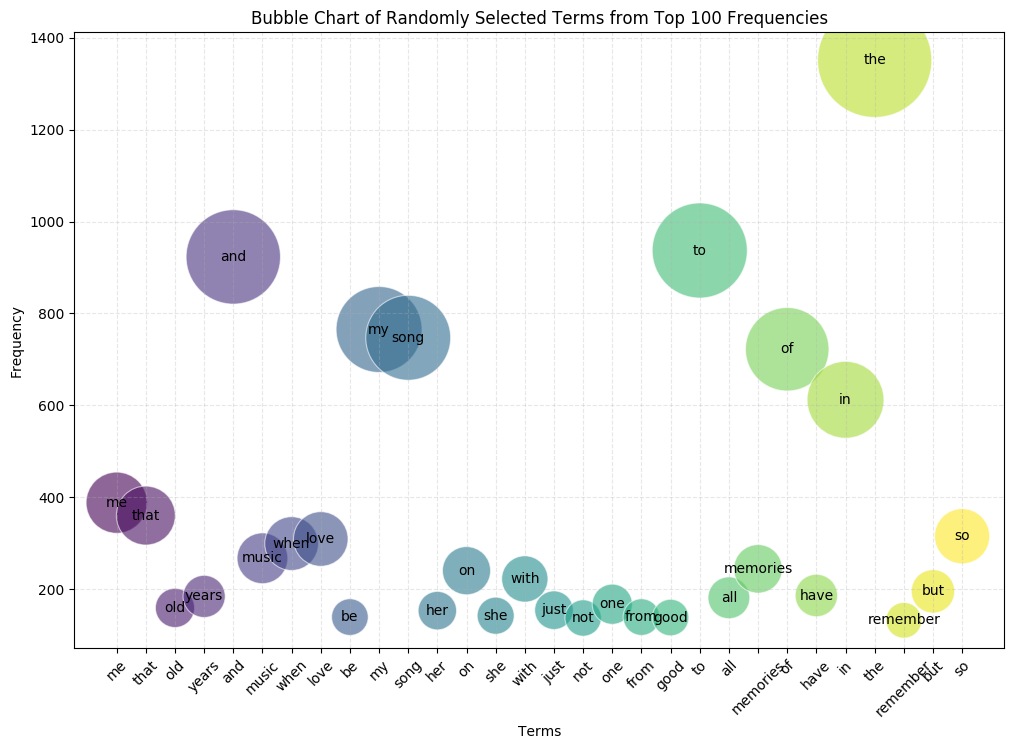

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total term frequencies and take the top 100 high-frequency terms
term_frequencies = tdm_df.sum(axis=0).sort_values(ascending=False)
top_100_terms = term_frequencies.head(50)  
random_30_terms = top_100_terms.sample(30)


bubble_size = random_30_terms.values * 5  
colors = plt.cm.viridis(np.linspace(0, 1, len(random_30_terms)))  

plt.figure(figsize=(12, 8))
plt.scatter(range(len(random_30_terms)), random_30_terms.values, s=bubble_size, color=colors, alpha=0.6, edgecolors="w", linewidth=0.8)

for i, term in enumerate(random_30_terms.index):
    plt.text(i, random_30_terms.values[i], term, ha='center', va='center', fontsize=10)

plt.title("Bubble Chart of Randomly Selected Terms from Top 100 Frequencies")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.xticks(range(len(random_30_terms)), random_30_terms.index, rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.show()


**Generate TF-IDF features**

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  
X_tfidf = vectorizer.fit_transform(X['comment'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.to_excel('tfidf_df.xlsx')


In [172]:
tfidf_df

000  045   07   10  100  10m   11  11th   12   13  ...      your  yours  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
...   ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...       ...    ...   
1493  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.253864    0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000    0.0   

      yourself  youth  youthful  youtube  yrs  yuo  yup  zealand  
0          0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
1          0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
2          0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
3          0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
4          0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
...        ...    ...       ...      ...  ...  ...  ...      ...  
1493       0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
1494       0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
1495       0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
1496       0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  
1497       0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0  

[1498 rows x 3000 columns]

**Implement a simple Naive Bayes classifier**

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf_vectorizer.fit_transform(X['comment'])

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)


In [176]:
from sklearn.naive_bayes import ComplementNB

# Use Complement Naive Bayes classifier
nb_classifier = ComplementNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9420    0.8263    0.8804       236
    nostalgia     0.8313    0.9439    0.8840       214

     accuracy                         0.8822       450
    macro avg     0.8867    0.8851    0.8822       450
 weighted avg     0.8894    0.8822    0.8821       450



### **Step4**

**Comment：** 
- If all term frequencies are displayed at once, it will be very crowded and not easy to observe, so I changed it to take the top few high term frequencies as the observation object. 
- Some term frequencies are too high, which makes the frequencies of other term frequencies look very small. These term frequencies may be stop words, so we can filter out these term frequencies through the stop words.